In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.svm import SVC

In [2]:
def standardize(data_matrix):
    """Standardizes the input data matrix column-wise (z-score normalization)."""
    row_of_means = np.mean(data_matrix, axis=0)
    standardized_matrix = data_matrix - row_of_means
    row_of_stds = np.std(standardized_matrix, axis=0)
    return (standardized_matrix / row_of_stds), row_of_means, row_of_stds

def de_standardize(standardized_matrix, row_of_means, row_of_stds):
    """Reverses the standardization process to return the data to its original scale."""
    matrix = np.copy(standardized_matrix * row_of_stds)
    return matrix + row_of_means

## Loading the data

In [3]:
file_path = "bank_data.csv"

credit_score = np.genfromtxt(file_path, delimiter=",", skip_header=1, usecols=[1]).astype(float)

country = np.genfromtxt(file_path, delimiter=",", skip_header=1, usecols=[2], dtype = None, encoding=None)
country_france = np.where(country == 'France', 1, 0).astype(int)
country_spain = np.where(country == 'Spain', 1, 0).astype(int)
country_germany = np.where(country == 'Germany', 1, 0).astype(int)

gender = np.genfromtxt(file_path, delimiter=",", skip_header=1, usecols=[3], dtype = None, encoding=None)
gender_male = np.where(gender == 'Male', 1, 0).astype(int)
gender_female = np.where(gender == 'Female', 1, 0).astype(int)

age = np.genfromtxt(file_path, delimiter=",", skip_header=1, usecols=[4]).astype(float)
tenure = np.genfromtxt(file_path, delimiter=",", skip_header=1, usecols=[5]).astype(float)
balance = np.genfromtxt(file_path, delimiter=",", skip_header=1, usecols=[6]).astype(float)
products_number = np.genfromtxt(file_path, delimiter=",",
                                skip_header=1, usecols=[7], dtype = None, encoding=None).astype(int)
credit_card = np.genfromtxt(file_path, delimiter=",",
                            skip_header=1, usecols=[8], dtype = None, encoding=None).astype(int)
active_member = np.genfromtxt(file_path, delimiter=",",
                              skip_header=1, usecols=[9], dtype = None, encoding=None).astype(int)
estimated_salary = np.genfromtxt(file_path, delimiter=",", skip_header=1, usecols=[10]).astype(float)
churn = np.genfromtxt(file_path, delimiter=",",
                      skip_header=1, usecols=[11], dtype = None, encoding=None).astype(int)

## Data Visualization

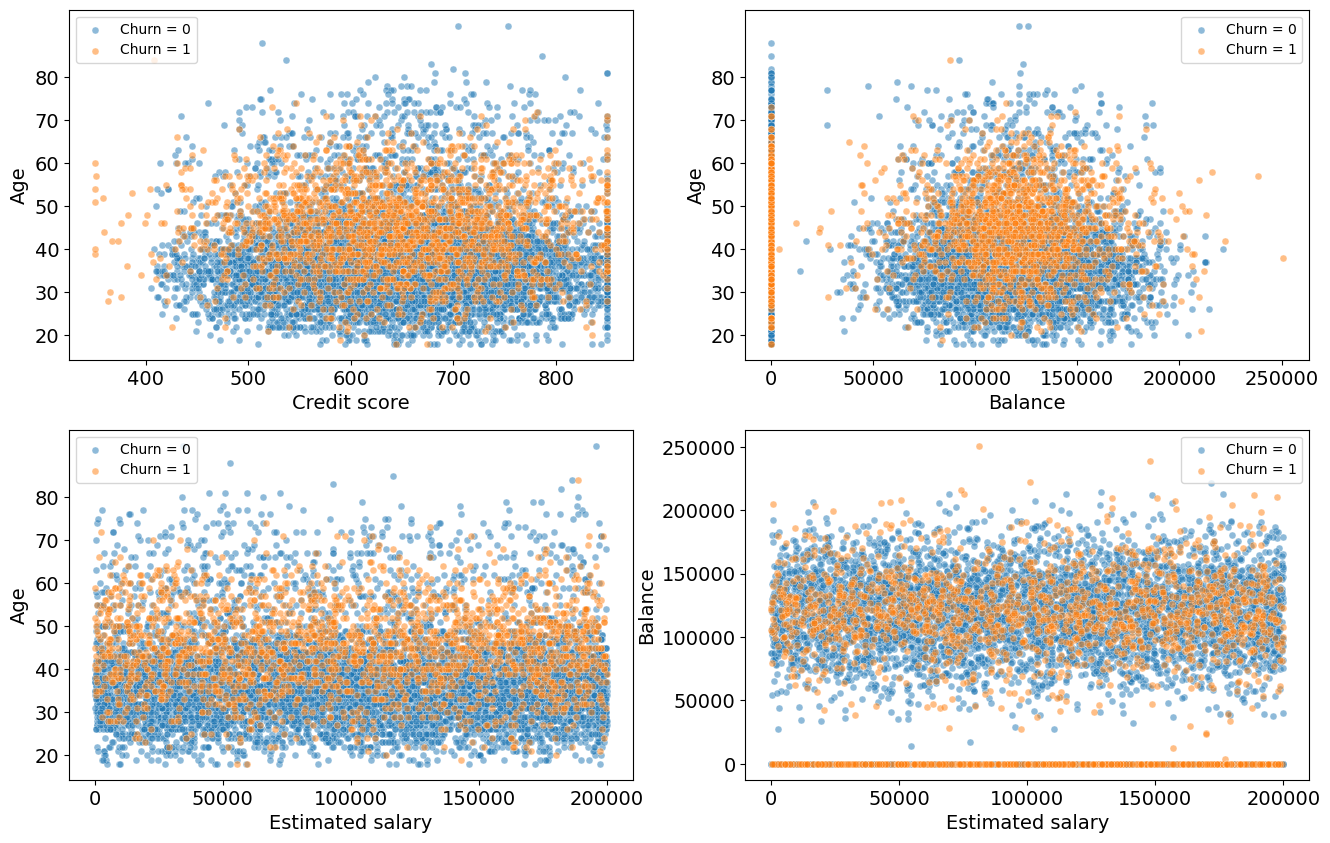

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

sns.scatterplot(x=credit_score[churn==0], y=age[churn==0], s=25, ax=axes[0,0], label="Churn = 0", alpha=0.5)
sns.scatterplot(x=credit_score[churn==1], y=age[churn==1], s=25, ax=axes[0,0], label="Churn = 1", alpha=0.5)
axes[0,0].set_xlabel("Credit score", fontsize=14)
axes[0,0].set_ylabel("Age", fontsize=14)
axes[0,0].tick_params(axis='x', labelsize=14)
axes[0,0].tick_params(axis='y', labelsize=14)
axes[0,0].legend(loc='upper left')
axes[0,0].set_yticks([20,30,40,50,60,70,80])

sns.scatterplot(x=balance[churn==0], y=age[churn==0], s=25, ax=axes[0,1], label="Churn = 0", alpha=0.5)
sns.scatterplot(x=balance[churn==1], y=age[churn==1], s=25, ax=axes[0,1], label="Churn = 1", alpha=0.5)
axes[0,1].set_xlabel("Balance", fontsize=14)
axes[0,1].set_ylabel("Age", fontsize=14)
axes[0,1].tick_params(axis='x', labelsize=14)
axes[0,1].tick_params(axis='y', labelsize=14)
axes[0,1].set_yticks([20,30,40,50,60,70,80])

sns.scatterplot(x=estimated_salary[churn==0], y=age[churn==0], s=25, ax=axes[1,0], label="Churn = 0", alpha=0.5)
sns.scatterplot(x=estimated_salary[churn==1], y=age[churn==1], s=25, ax=axes[1,0], label="Churn = 1", alpha=0.5)
axes[1,0].set_xlabel("Estimated salary", fontsize=14)
axes[1,0].set_ylabel("Age", fontsize=14)
axes[1,0].tick_params(axis='x', labelsize=14)
axes[1,0].tick_params(axis='y', labelsize=14)
axes[1,0].set_yticks([20,30,40,50,60,70,80])
axes[1,0].set_xticks([0,50000,100000,150000,200000])

sns.scatterplot(x=estimated_salary[churn==0], y=balance[churn==0], s=25, ax=axes[1,1], label="Churn = 0", alpha=0.5)
sns.scatterplot(x=estimated_salary[churn==1], y=balance[churn==1], s=25, ax=axes[1,1], label="Churn = 1", alpha=0.5)
axes[1,1].set_xlabel("Estimated salary", fontsize=14)
axes[1,1].set_ylabel("Balance", fontsize=14)
axes[1,1].tick_params(axis='x', labelsize=14)
axes[1,1].tick_params(axis='y', labelsize=14)
axes[1,1].set_xticks([0,50000,100000,150000,200000])
plt.show()

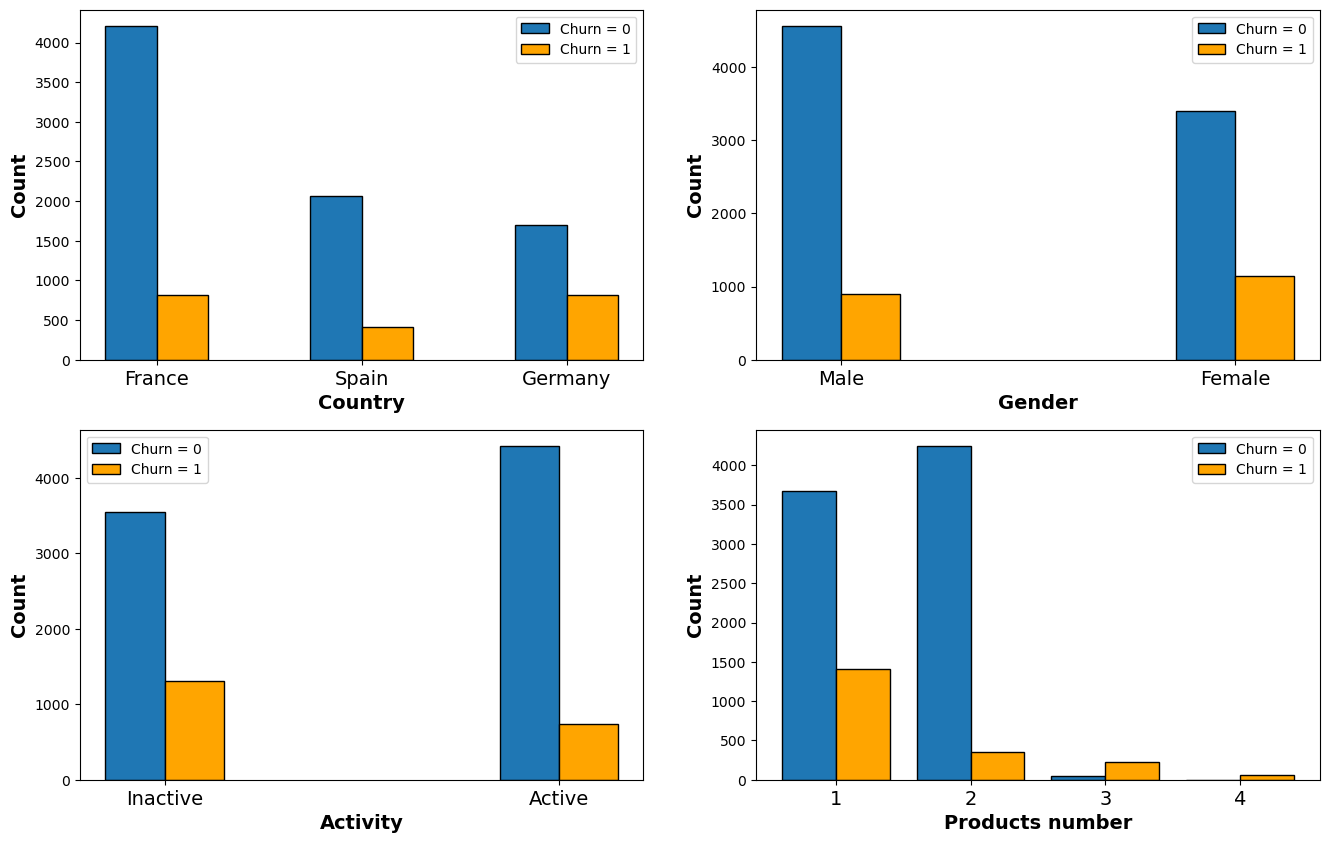

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

churn_0_counts_countries = [np.sum(country_france & (churn == 0)),
                  np.sum(country_spain & (churn == 0)),
                  np.sum(country_germany & (churn == 0))]

churn_1_counts_countries = [np.sum(country_france & (churn == 1)),
                  np.sum(country_spain & (churn == 1)),
                  np.sum(country_germany & (churn == 1))]

countries = ["France", "Spain", "Germany"]
bar_width = 0.25
index_countries = np.arange(len(countries))

axes[0,0].bar(index_countries, churn_0_counts_countries, width=bar_width, label="Churn = 0", edgecolor="black")
axes[0,0].bar(index_countries + bar_width, churn_1_counts_countries, width=bar_width,
              label="Churn = 1", color="orange", edgecolor="black")

axes[0,0].set_xlabel("Country", fontsize=14, fontweight="bold")
axes[0,0].set_ylabel("Count", fontsize=14, fontweight="bold")
axes[0,0].set_xticks(index_countries + bar_width / 2)
axes[0,0].set_xticklabels(countries,fontsize=14)
axes[0,0].legend()

churn_0_counts_genders = [np.sum(gender_male & (churn == 0)),
                  np.sum(gender_female & (churn == 0))]

churn_1_counts_genders = [np.sum(gender_male & (churn == 1)),
                  np.sum(gender_female & (churn == 1))]

genders = ["Male", "Female"]
bar_width = 0.15
index_genders = np.arange(len(genders))


axes[0,1].bar(index_genders, churn_0_counts_genders, width=bar_width, label="Churn = 0", edgecolor="black")
axes[0,1].bar(index_genders + bar_width, churn_1_counts_genders, width=bar_width,
              label="Churn = 1",color="orange", edgecolor="black")

axes[0,1].set_xlabel("Gender", fontsize=14, fontweight="bold")
axes[0,1].set_ylabel("Count", fontsize=14, fontweight="bold")
axes[0,1].set_xticks(index_genders + bar_width / 2)
axes[0,1].set_xticklabels(genders, fontsize=14)
axes[0,1].legend()


inactive=[active_member==0]
active=[active_member==1]

churn_0_counts_activity = [np.sum(inactive & (churn == 0)),
                  np.sum(active & (churn == 0))]

churn_1_counts_activity = [np.sum(inactive & (churn == 1)),
                  np.sum(active & (churn == 1))]

activity = ["Inactive", "Active"]
bar_width = 0.15
index_activity = np.arange(len(activity))


axes[1,0].bar(index_activity, churn_0_counts_activity, width=bar_width, label="Churn = 0", edgecolor="black")
axes[1,0].bar(index_activity + bar_width, churn_1_counts_activity, width=bar_width,
              label="Churn = 1",color="orange", edgecolor="black")

axes[1,0].set_xlabel("Activity",fontsize=14, fontweight="bold")
axes[1,0].set_ylabel("Count",fontsize=14, fontweight="bold")
axes[1,0].set_xticks(index_activity + bar_width / 2)
axes[1,0].set_xticklabels(activity, fontsize=14)
axes[1,0].legend()

one_product=[products_number==1]
two_product=[products_number==2]
three_product=[products_number==3]
four_product=[products_number==4]

churn_0_counts_products = [np.sum(one_product & (churn == 0)),
                  np.sum(two_product & (churn == 0)), np.sum(three_product & (churn == 0)),
                          np.sum(four_product & (churn == 0))]

churn_1_counts_products = [np.sum(one_product & (churn == 1)),
                  np.sum(two_product & (churn == 1)), np.sum(three_product & (churn == 1)),
                          np.sum(four_product & (churn == 1))]

products = ["1", "2", "3", "4"]
bar_width = 0.4
index_products = np.arange(len(products))


axes[1,1].bar(index_products, churn_0_counts_products, width=bar_width, label="Churn = 0", edgecolor="black")
axes[1,1].bar(index_products + bar_width, churn_1_counts_products, width=bar_width,
              label="Churn = 1", color="orange", edgecolor="black")

axes[1,1].set_xlabel("Products number", fontsize=14, fontweight="bold")
axes[1,1].set_ylabel("Count", fontsize=14, fontweight="bold")
axes[1,1].set_xticks(index_products + bar_width / 2)
axes[1,1].set_xticklabels(products, fontsize=14)
axes[1,1].legend()
plt.show()

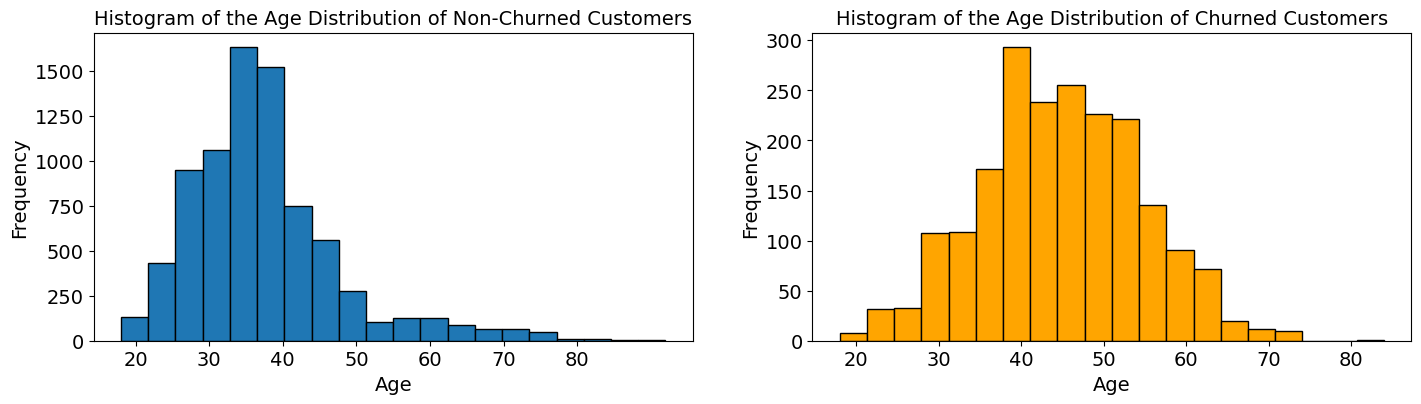

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 4))

axes[0].hist(age[churn==0],label="Churn = 0",bins=20, edgecolor="black")
axes[0].set_xlabel("Age",fontsize=14)
axes[0].set_ylabel("Frequency",fontsize=14)
axes[0].set_title("Histogram of the Age Distribution of Non-Churned Customers", fontsize=14)
axes[0].tick_params(axis='x', labelsize=14)
axes[0].tick_params(axis='y', labelsize=14)
axes[0].set_xticks([20,30,40,50,60,70,80])

axes[1].hist(age[churn==1],label="Churn = 1", color="orange", bins=20, edgecolor="black")
axes[1].set_xlabel("Age",fontsize=14)
axes[1].set_ylabel("Frequency",fontsize=14)
axes[1].set_title("Histogram of the Age Distribution of Churned Customers", fontsize=14)
axes[1].tick_params(axis='x', labelsize=14)
axes[1].tick_params(axis='y', labelsize=14)
axes[1].set_xticks([20,30,40,50,60,70,80])
plt.show()

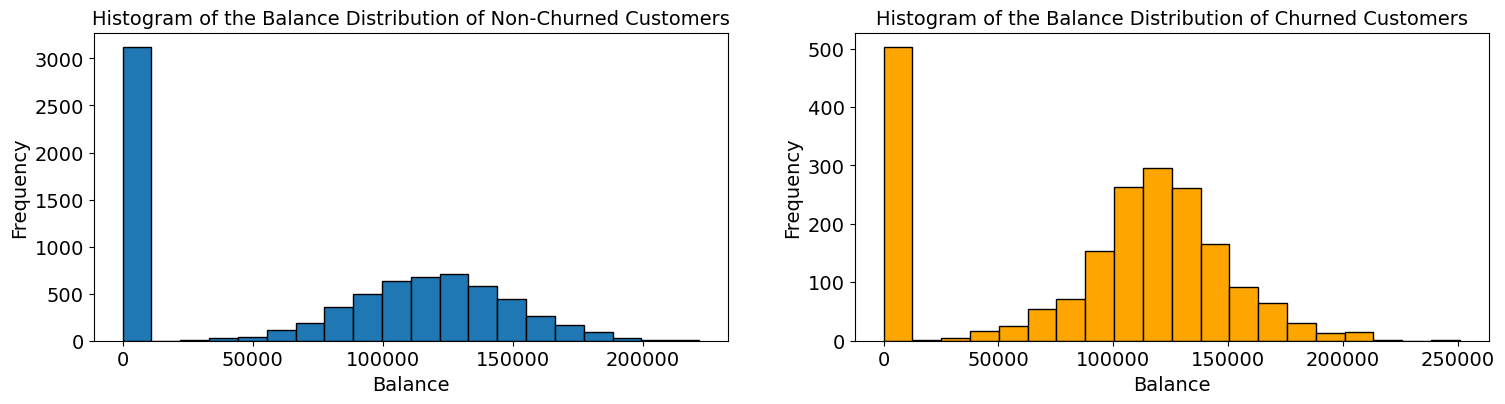

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))

axes[0].hist(balance[churn==0],label="Churn = 0", bins=20, edgecolor="black")
axes[0].set_xlabel("Balance", fontsize=14)
axes[0].set_ylabel("Frequency", fontsize=14)
axes[0].set_title("Histogram of the Balance Distribution of Non-Churned Customers", fontsize=14)
axes[0].tick_params(axis='x', labelsize=14)
axes[0].tick_params(axis='y', labelsize=14)

axes[1].hist(balance[churn==1], label="Churn = 1", color="orange", bins=20, edgecolor="black")
axes[1].set_xlabel("Balance", fontsize=14)
axes[1].set_ylabel("Frequency", fontsize=14)
axes[1].set_title("Histogram of the Balance Distribution of Churned Customers", fontsize=14)
axes[1].tick_params(axis='x', labelsize=14)
axes[1].tick_params(axis='y', labelsize=14)
plt.show()

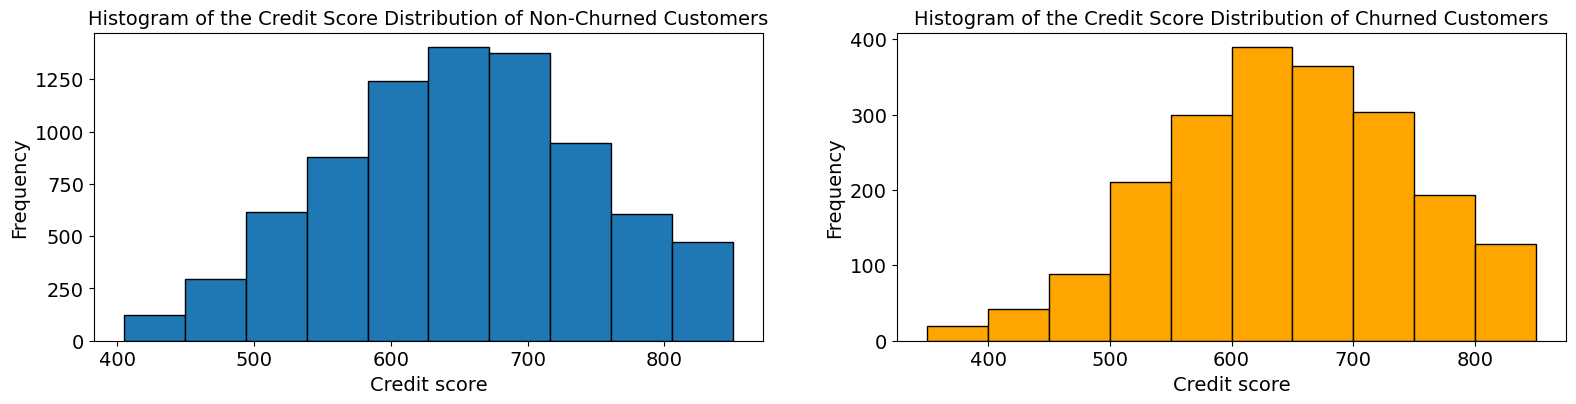

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(19, 4))

axes[0].hist(credit_score[churn==0], label="Churn = 0", edgecolor="black")
axes[0].set_xlabel("Credit score", fontsize=14)
axes[0].set_ylabel("Frequency", fontsize=14)
axes[0].set_title("Histogram of the Credit Score Distribution of Non-Churned Customers", fontsize=14)
axes[0].tick_params(axis='x', labelsize=14)
axes[0].tick_params(axis='y', labelsize=14)

axes[1].hist(credit_score[churn==1], label="Churn = 1", color="orange", edgecolor="black")
axes[1].set_xlabel("Credit score", fontsize=14)
axes[1].set_ylabel("Frequency", fontsize=14)
axes[1].set_title("Histogram of the Credit Score Distribution of Churned Customers", fontsize=14)
axes[1].tick_params(axis='x', labelsize=14)
axes[1].tick_params(axis='y', labelsize=14)

## Logistic Regression

The function **<font color='red'>linear_regression_data</font>** creates a data matrix for the input data. The function **<font color='red'>linear_model</font>** multiplies the data matrix by the features' weights.

In [9]:
def linear_regression_data(data_inputs):
    """Prepares the data matrix for linear regression by adding an intercept term."""
    first_column = np.ones((len(data_inputs), 1))
    X_matrix = np.c_[first_column, data_inputs]
    return X_matrix

def linear_model(data_matrix, weights):
    """Computes the linear model output (predictions) for the given data and weights."""
    return data_matrix @ weights

The output of **<font color='red'>logistic_function</font>** is the probability that the input has a label 1.

In [10]:
def logistic_function(inputs):
    """Applies the logistic (sigmoid) function element-wise to the input array."""
    return 1 / (1 + np.exp(-inputs))

**<font color='red'>binary_prediction_function</font>** returns **True** if the probability output of the logistic function is greater than 0.5 and **False** otherwise.

In [11]:
def binary_prediction_function(data_matrix, weights):
    """Generates binary predictions by applying a linear model followed by the logistic function
    to compute predicted probabilities"""
    probability = logistic_function(linear_model(data_matrix, weights))
    return probability > 1/2

**<font color='red'>gradient_descent</font>** returns the weights that minimize the cost function.

In [12]:
def gradient_descent(alpha, objective, gradient, initial_weights, step_size=1, no_of_iterations=100, print_output=10):
    """Performs gradient descent optimization on a given objective function."""
    objective_values = []
    weights = np.copy(initial_weights)
    objective_values.append(objective(weights, alpha))
    for counter in range(no_of_iterations):
        weights -= step_size * gradient(weights, alpha)
        objective_values.append(objective(weights, alpha))
    return weights, objective_values

def binary_logistic_regression_cost_function(data_matrix, data_labels, weights, alpha=0):
    """Computes the regularized binary logistic regression cost (cross-entropy loss with L2 penalty)."""
    regression_outputs = linear_model(data_matrix, weights)
    return np.mean(np.log(1 + np.exp(regression_outputs)) - data_labels *\
                   regression_outputs)+(alpha/2)*(np.linalg.norm(weights))**2

def binary_logistic_regression_gradient(data_matrix, data_labels, weights, alpha=0):
    """Computes the gradient of the regularized binary logistic regression cost function."""
    return data_matrix.T @ (logistic_function(linear_model(data_matrix, weights))\
                            - data_labels) / len(data_matrix)+alpha*weights

**<font color='red'>classification_accuracy</font>** returns the proportion of the estimated labels that match the true labels.

In [13]:
def classification_accuracy(estimated_labels, true_labels):
    """Computes the classification accuracy between predicted and true labels."""
    equal_labels = estimated_labels == true_labels
    return np.mean(equal_labels)

**<font color='red'>k_fold_split</font>** splits the data randomly into **K** even folds.

In [14]:
def k_fold_split(data_size, K):
    """Splits indices for K-fold cross-validation in a balanced and randomized way."""
    np.random.seed(1)
    indexes = np.random.permutation(data_size)
    m, r = divmod(data_size, K)
    indexes_split = [indexes[i * m + min(i, r):(i + 1) * m + min(i + 1, r)] for i in range(K)]
    return indexes_split

The following function uses **<font color='red'>k_fold_split</font>** to randomly split the data into **K** folds where one fold is used as the test set and the remaining folds as the train set.

In [15]:
def k_fold_cross_validation_logistic_regression(data_matrix, data_outputs, K, alpha):
    """Performs K-fold cross-validation for regularized binary logistic regression."""
    data_size = len(data_matrix)
    indexes_split = k_fold_split(data_size, K)  # split data into K folds
    
    for i in range(K):

        # collect indices of all folds except the i-th (training set)
        indexes = np.concatenate([indexes_split[j] for j in range(K) if (j != i)]) 
        
        # define cost function for this fold
        cost_function = lambda weights, alpha: \
        binary_logistic_regression_cost_function(data_matrix[indexes], data_outputs[indexes], weights, alpha)

        # define gradient function for this fold
        gradient_function = lambda weights, alpha: \
        binary_logistic_regression_gradient(data_matrix[indexes], data_outputs[indexes], weights, alpha)

        # initialize weights as zeros
        initial_weights = np.zeros((len(data_matrix[indexes].T), 1))

        # compute step size using data norm
        step_size = 3.9 * len(data_matrix[indexes]) / (np.linalg.norm(data_matrix[indexes]))**2

        # perform gradient descent to find optimal weights for training set
        training_set_optimal_weights, objective_values = gradient_descent(
            alpha, cost_function, gradient_function,
            initial_weights, step_size, 800, 200
        )

        # predict labels on test fold
        predicted_labels = binary_prediction_function(data_matrix[indexes_split[i]], training_set_optimal_weights)

        # compute accuracy on test fold
        accuracy_rate = classification_accuracy(predicted_labels, data_outputs[indexes_split[i]])
        
        # accumulate average weights and accuracy across folds
        if (i == 0):
            optimal_weights = training_set_optimal_weights / K
            accuracy = accuracy_rate / K
        else:
            optimal_weights += training_set_optimal_weights / K
            accuracy += accuracy_rate / K
            
    return optimal_weights, accuracy

In [16]:
def grid_search(objective, grid):
    """Performs a simple grid search to find the input that maximizes the objective function."""
    values = np.array([])
    for point in grid:
        values = np.append(values, objective(point))
    return grid[np.argmax(values)]

### 1st case

All features are selected

In [17]:
bank_input = np.c_[credit_score, country_france, country_spain, country_germany, gender_male, gender_female, age,\
                   tenure, balance, products_number, credit_card, active_member, estimated_salary]
bank_labels = churn.reshape(-1, 1)
bank_input, bank_row_of_means, bank_row_of_stds = standardize(bank_input)
bank_data_matrix = linear_regression_data(bank_input)

K = 5
alpha_grid = np.append(np.array([i * 0.1 for i in range(10)]), np.array([i for i in range(1, 6)]))
accuracy = lambda alpha: k_fold_cross_validation_logistic_regression(bank_data_matrix, bank_labels, 5, alpha)[1]
optimal_alpha = grid_search(accuracy, alpha_grid)
optimal_weights, maximum_accuracy = k_fold_cross_validation_logistic_regression(bank_data_matrix,\
                                                                                bank_labels, K, optimal_alpha)

print("Optimal alpha:", optimal_alpha)
print("\nThe optimal weights for the optimal alpha are:\nw = {w}.T".format(w=optimal_weights.T))
print("\nThe classification accuracy of the model is {p}%".format(p = 100 * maximum_accuracy))

Optimal alpha: 0.0

The optimal weights for the optimal alpha are:
w = [[-1.65416948 -0.06443615 -0.12191415 -0.09015703  0.23037683 -0.1314713
   0.1314713   0.76277556 -0.04602994  0.16444243 -0.0595819  -0.02040048
  -0.53775721  0.02767425]].T

The classification accuracy of the model is 81.08999999999999%


Here the inputs where `products_number` is greater than 2 and `credit_score` is less than 400 are removed

In [18]:
selected_indexes = np.where((products_number < 3) & (credit_score > 400))

bank_input = np.c_[credit_score[selected_indexes], country_france[selected_indexes], country_spain[selected_indexes],\
                   country_germany[selected_indexes], gender_male[selected_indexes], gender_female[selected_indexes],\
                   age[selected_indexes], tenure[selected_indexes], balance[selected_indexes],\
                   products_number[selected_indexes], credit_card[selected_indexes], active_member[selected_indexes],\
                   estimated_salary[selected_indexes]]
bank_labels = churn[selected_indexes].reshape(-1, 1)
bank_input, bank_row_of_means, bank_row_of_stds = standardize(bank_input)
bank_data_matrix = linear_regression_data(bank_input)

K = 5
alpha_grid = np.append(np.array([i * 0.1 for i in range(10)]), np.array([i for i in range(1, 6)]))
accuracy = lambda alpha: k_fold_cross_validation_logistic_regression(bank_data_matrix, bank_labels, 5, alpha)[1]
optimal_alpha = grid_search(accuracy, alpha_grid)
optimal_weights, maximum_accuracy = k_fold_cross_validation_logistic_regression(bank_data_matrix,\
                                                                                bank_labels, K, optimal_alpha)

print("Optimal alpha:", optimal_alpha)
print("\nThe optimal weights for the optimal alpha are:\nw = {w}.T".format(w=optimal_weights.T))
print("\nThe classification accuracy of the model is {p}%".format(p = 100 * maximum_accuracy))

Optimal alpha: 0.0

The optimal weights for the optimal alpha are:
w = [[-1.998179   -0.03566927 -0.15243526 -0.11116407  0.28815786 -0.13021005
   0.13021005  0.74369253 -0.05512528 -0.07731185 -0.77838621 -0.02941926
  -0.55677757  0.01449457]].T

The classification accuracy of the model is 84.1787743399884%


### 2nd case

Selected features: `country_germany`, `gender_male`, `age`, `products_number`, `active_member`

In [21]:
selected_indexes = np.where((products_number < 3) & (credit_score > 400))

bank_input = np.c_[country_germany[selected_indexes], gender_male[selected_indexes],\
                   age[selected_indexes], products_number[selected_indexes], active_member[selected_indexes]]
bank_labels = churn[selected_indexes].reshape(-1, 1)
bank_input, bank_row_of_means, bank_row_of_stds = standardize(bank_input)
bank_data_matrix = linear_regression_data(bank_input)

K = 5
optimal_weights, maximum_accuracy = k_fold_cross_validation_logistic_regression(bank_data_matrix, bank_labels, K, 0)

print("\nThe optimal weights for alpha = 0 are:\nw = {w}.T".format(w=optimal_weights.T))
print("\nThe classification accuracy of the model is {p}%".format(p = 100 * maximum_accuracy))


The optimal weights for alpha = 0 are:
w = [[-1.99706343  0.38675373 -0.26277867  0.74468788 -0.75537988 -0.55523188]].T

The classification accuracy of the model is 84.05451857188962%


### 3rd case

Selected features: `age`, `products_number`, `active_member`

In [22]:
selected_indexes = np.where((products_number < 3) & (credit_score > 400))

bank_input = np.c_[age[selected_indexes], products_number[selected_indexes],
                   active_member[selected_indexes]]
bank_labels = churn[selected_indexes].reshape(-1, 1)
bank_input, bank_row_of_means, bank_row_of_stds = standardize(bank_input)
bank_data_matrix = linear_regression_data(bank_input)

K = 5
optimal_weights, maximum_accuracy = k_fold_cross_validation_logistic_regression(bank_data_matrix, bank_labels, K, 0)

print("\nThe optimal weights for alpha = 0 are:\nw = {w}.T".format(w=optimal_weights.T))
print("\nThe classification accuracy of the model is {p}%".format(p = 100 * maximum_accuracy))


The optimal weights for alpha = 0 are:
w = [[-1.92839558  0.74345718 -0.75076591 -0.55992686]].T

The classification accuracy of the model is 83.75428472787354%


## K-Nearest Neighbors

In [23]:
def pairwise_distances(from_data, to_data):
    """Computes pairwise the Euclidean distance between each row-vector in the first array
    and all row-vectors in the second array."""
    distance=np.zeros((len(from_data),len(to_data)),float)
    counter_1=0
    for vector_x in from_data:
        first_vector=vector_x
        counter_2=0
        for vector_y in to_data:
            second_vector=vector_y
            distance[counter_1,counter_2]=np.sqrt(np.sum((vector_x-vector_y)**2))
            counter_2+=1
        counter_1+=1 
    return distance

def knn_classification(testing_inputs, training_inputs, training_outputs, no_of_neighbors):
    """
    Classifies test samples using K-Nearest Neighbors algorithm.
    """
    # Compute pairwise distances between test and training samples
    distances = pairwise_distances(testing_inputs, training_inputs)

    # Sort distances and align training labels
    sorted_indices = np.argsort(distances, axis=1)
    no_of_inputs = len(testing_inputs)
    no_of_points = len(training_inputs)

    new_array_to_sort = np.broadcast_to(training_outputs, (no_of_inputs, no_of_points))
    sorted_labels = np.take_along_axis(new_array_to_sort, sorted_indices, axis=1)

    # Initialize predictions
    predicted_labels = np.zeros(no_of_inputs, dtype=int)

    # Loop through each test sample
    for id_input in range(no_of_inputs):
        # Count votes among k neighbors
        probability_labels = np.zeros(int(np.max(training_outputs) + 1), dtype=float)

        for id_neighbor in range(no_of_neighbors):
            label = sorted_labels[id_input][id_neighbor]
            probability_labels[label] += 1.0 / no_of_neighbors

        # Assign the label with the highest vote
        predicted_labels[id_input] = np.argmax(probability_labels)

    return predicted_labels

def k_fold_split(data_size, K):
    np.random.seed(123456789)
    indexes = np.random.permutation(data_size)
    m, r = divmod(data_size, K)
    indexes_split = [indexes[i * m + min(i, r):(i + 1) * m + min(i + 1, r)] for i in range(K)]
    return indexes_split

def k_fold_cross_validation_knn(data_inputs, data_outputs, K, labels_evaluation, misclassification_evaluation,
                                no_of_neighbors):
    """Performs K-fold cross-validation for KNN classification."""
    data_size = len(data_inputs)
    indexes_split = k_fold_split(data_size, K)  # split data into K folds

    average_accuracy = 0  # initialize average accuracy
    
    for i in range(K):
        # collect indices of all folds except the i-th (training set)
        training_indexes = np.concatenate([indexes_split[j] for j in range(K) if (j != i)])
        
        # predict labels for validation fold using KNN
        predicted_labels = labels_evaluation(
            data_inputs[indexes_split[i]],
            data_inputs[training_indexes],
            data_outputs[training_indexes],
            no_of_neighbors
        )
        
        # compute accuracy on validation fold
        accuracy = misclassification_evaluation(predicted_labels, data_outputs[indexes_split[i]])
        average_accuracy += accuracy / K  # accumulate average accuracy
    
    # compute misclassification error
    error = 1.0 - average_accuracy
    return error


def grid_search(objective, grid):
    values = np.array([])
    for point in grid:
        values = np.append(values, objective(point))
    return grid[np.argmin(values)]

### 1st case

Selected features: `age`

In [26]:
selected_indexes = np.where((products_number < 3) & (credit_score > 400))
indexes_of_ordered = np.argsort(age[selected_indexes])[::5]
bank_input = np.c_[age[selected_indexes][indexes_of_ordered]]
bank_output = churn[selected_indexes][indexes_of_ordered]
bank_input, bank_row_of_means, bank_row_of_stds = standardize(bank_input)

K = 5
data_size = len(bank_input)
no_of_neighbors_list = list(range(5, 26, 1))

evaluation = lambda testing_data_inputs, training_data_inputs, training_data_outputs, no_of_neighbors: \
knn_classification(testing_data_inputs, training_data_inputs, training_data_outputs, no_of_neighbors)

misclassification_evaluation = lambda predicted_labels, true_labels: \
classification_accuracy(predicted_labels, true_labels)

K_objective_function = lambda no_of_neighbors: \
k_fold_cross_validation_knn(bank_input, bank_output, K, evaluation, misclassification_evaluation, no_of_neighbors)

optimal_no_of_neighbors = grid_search(K_objective_function, no_of_neighbors_list)
optimal_classification_error = K_objective_function(optimal_no_of_neighbors)

print("The optimal number of neighbors is {n}\
\nThe classification error is {e:2.2f}%".format(n = optimal_no_of_neighbors, e = 100 * optimal_classification_error))

The optimal number of neighbors is 19
The classification error is 16.92%


### 2nd case

Selected features: `age`, `products_number`

In [27]:
selected_indexes = np.where((products_number < 3) & (credit_score > 400))
indexes_of_ordered = np.argsort(age[selected_indexes])[::5]
bank_input = np.c_[age[selected_indexes][indexes_of_ordered], products_number[selected_indexes][indexes_of_ordered]]
bank_output = churn[selected_indexes][indexes_of_ordered]
bank_input, bank_row_of_means, bank_row_of_stds = standardize(bank_input)

K = 5
data_size = len(bank_input)
no_of_neighbors_list = list(range(5, 26, 1))

evaluation = lambda testing_data_inputs, training_data_inputs, training_data_outputs, no_of_neighbors: \
knn_classification(testing_data_inputs, training_data_inputs, training_data_outputs, no_of_neighbors)

misclassification_evaluation = lambda predicted_labels, true_labels: \
classification_accuracy(predicted_labels, true_labels)

K_objective_function = lambda no_of_neighbors: \
k_fold_cross_validation_knn(bank_input, bank_output, K, evaluation, misclassification_evaluation, no_of_neighbors)

optimal_no_of_neighbors = grid_search(K_objective_function, no_of_neighbors_list)
optimal_classification_error = K_objective_function(optimal_no_of_neighbors)

print("The optimal number of neighbors is {n}\
\nThe classification error is {e:2.2f}%".format(n = optimal_no_of_neighbors, e = 100 * optimal_classification_error))

The optimal number of neighbors is 20
The classification error is 14.91%


### 3rd case

Selected features: `age`, `products_number`, `active_member`

In [28]:
selected_indexes = np.where((products_number < 3) & (credit_score > 400))
indexes_of_ordered = np.argsort(age[selected_indexes])[::5]
bank_input = np.c_[age[selected_indexes][indexes_of_ordered], products_number[selected_indexes][indexes_of_ordered],
                  active_member[selected_indexes][indexes_of_ordered]]
bank_output = churn[selected_indexes][indexes_of_ordered]
bank_input, bank_row_of_means, bank_row_of_stds = standardize(bank_input)

K = 5
data_size = len(bank_input)
no_of_neighbors_list = list(range(5, 26, 1))

evaluation = lambda testing_data_inputs, training_data_inputs, training_data_outputs, no_of_neighbors: \
knn_classification(testing_data_inputs, training_data_inputs, training_data_outputs, no_of_neighbors)

misclassification_evaluation = lambda predicted_labels, true_labels: \
classification_accuracy(predicted_labels, true_labels)

K_objective_function = lambda no_of_neighbors: \
k_fold_cross_validation_knn(bank_input, bank_output, K, evaluation, misclassification_evaluation, no_of_neighbors)

optimal_no_of_neighbors = grid_search(K_objective_function, no_of_neighbors_list)
optimal_classification_error = K_objective_function(optimal_no_of_neighbors)

print("The optimal number of neighbors is {n}\
\nThe classification error is {e:2.2f}%".format(n = optimal_no_of_neighbors, e = 100 * optimal_classification_error))

The optimal number of neighbors is 9
The classification error is 13.35%


### 4th case

Selected features: estimated_salary

In [29]:
selected_indexes = np.where((products_number < 3) & (credit_score > 400))
indexes_of_ordered = np.argsort(estimated_salary[selected_indexes])[::5]
bank_input = np.c_[estimated_salary[selected_indexes][indexes_of_ordered]]
bank_output = churn[selected_indexes][indexes_of_ordered]
bank_input, bank_row_of_means, bank_row_of_stds = standardize(bank_input)

K = 5
data_size = len(bank_input)
no_of_neighbors_list = list(range(5, 26, 1))

evaluation = lambda testing_data_inputs, training_data_inputs, training_data_outputs, no_of_neighbors: \
knn_classification(testing_data_inputs, training_data_inputs, training_data_outputs, no_of_neighbors)

misclassification_evaluation = lambda predicted_labels, true_labels: \
classification_accuracy(predicted_labels, true_labels)

K_objective_function = lambda no_of_neighbors: \
k_fold_cross_validation_knn(bank_input, bank_output, K, evaluation, misclassification_evaluation, no_of_neighbors)

optimal_no_of_neighbors = grid_search(K_objective_function, no_of_neighbors_list)
optimal_classification_error = K_objective_function(optimal_no_of_neighbors)

print("The optimal number of neighbors is {n}\
\nThe classification error is {e:2.2f}%".format(n = optimal_no_of_neighbors, e = 100 * optimal_classification_error))

The optimal number of neighbors is 18
The classification error is 19.10%


## Support Vector Machines

In [30]:
def k_fold_cross_validation_svm(data_matrix, data_outputs, K, regularisation_parameter):
    """Performs K-fold cross-validation for a Support Vector Machine (SVM) classifier."""
    data_size = len(data_matrix)
    indexes_split = k_fold_split(data_size, K)
    svm_classifier = SVC(C=regularisation_parameter)

    average_accuracy = 0.0

    for i in range(K):
        # Split training and validation sets
        train_indices = np.concatenate([indexes_split[j] for j in range(K) if j != i])
        val_indices = indexes_split[i]

        # Train SVM on training folds
        svm_classifier.fit(data_matrix[train_indices], data_outputs[train_indices])

        # Predict on validation fold
        estimated_labels = svm_classifier.predict(data_matrix[val_indices])

        # Compute accuracy
        fold_accuracy = classification_accuracy(estimated_labels, data_outputs[val_indices])
        average_accuracy += fold_accuracy / K

    return average_accuracy

def grid_search(objective, grid):
    values = np.array([])
    for point in grid:
        values = np.append(values, objective(point))
    return grid[np.argmax(values)]

### 1st case

All features selected

In [31]:
bank_input = np.c_[credit_score, country_france, country_spain, country_germany, gender_male, gender_female, age,
                   tenure, balance, products_number, credit_card, active_member, estimated_salary]
bank_input = standardize(bank_input)[0]
bank_labels = churn

K=5
regularization_parameter_grid = np.array([i * 0.5 for i in range(1,21)])
accuracy = lambda regularization_parameter: k_fold_cross_validation_svm(bank_input, bank_labels,
                                                                        K, regularization_parameter)
optimal_regularization_parameter = grid_search(accuracy, regularization_parameter_grid)
maximum_accuracy = k_fold_cross_validation_svm(bank_input, bank_labels, K, optimal_regularization_parameter)

print("The optimal regularization parameter is", optimal_regularization_parameter)
print("\nThe classification accuracy of the model with the optimal regularization parameter is {p}%"
      .format(p = 100 * maximum_accuracy))

The optimal regularisation parameter is  4.0

The classification accuracy of the model with the optimal regularisation parameter is 85.52%


### 2nd case

Selected features: `country_germany`, `gender_male`, `age`, `products_number`, `active_member`

In [32]:
bank_input = np.c_[country_germany, gender_male, age, products_number, active_member]
bank_input = standardize(bank_input)[0]
bank_labels = churn

K=5
regularization_parameter_grid = np.array([i * 0.5 for i in range(1,21)])
accuracy = lambda regularization_parameter: k_fold_cross_validation_svm(bank_input, bank_labels,
                                                                        K, regularization_parameter)
optimal_regularization_parameter = grid_search(accuracy, regularization_parameter_grid)
maximum_accuracy = k_fold_cross_validation_svm(bank_input, bank_labels, K, optimal_regularization_parameter)

print("The optimal regularization parameter is", optimal_regularization_parameter)
print("\nThe classification accuracy of the model with the optimal regularization parameter is {p}%"
      .format(p = 100 * maximum_accuracy))

The optimal regularization parameter is  8.5

The classification accuracy of the model with the optimal regularization parameter is 85.88%
